In [11]:
import math
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches
import matplotlib.colors
from sklearn import preprocessing
%matplotlib inline

In [12]:
gpdf = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

all_airports = pd.read_csv("../data/datasets/allairports.csv", encoding = "ISO-8859-1")
df = pd.read_csv("../data/datasets/top100airport.csv")

In [13]:
df.head()

,Rank,Airport,Code,Location,Country,Passengers
0,1,Hartsfield–Jackson Atlanta International Airport,ATL,Atlanta,United States,"103,902,992"
1,2,Beijing Capital International Airport,PEK,Beijing,China,"95,786,442"
2,3,Dubai International Airport,DXB,Dubai,United Arab Emirates,"88,242,099"
3,4,Los Angeles International Airport,LAX,Los Angeles,United States,"84,557,968"
4,5,O'Hare International Airport,ORD,Chicago,United States,"79,828,183"


In [14]:
all_airports.head()

,Airport_ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,TZ,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789002,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [15]:
df['Passengers'] = df['Passengers'].str.replace(",","").astype(int)

In [16]:
all_airports = all_airports[['IATA', 'Latitude', 'Longitude']].rename(columns={"IATA": "Code"})

In [17]:
df = df.merge(all_airports, how="left", on="Code")

In [18]:
x = df[['Passengers']].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scaled_df = pd.DataFrame(x_scaled)
df['Passengers'] = scaled_df[list(scaled_df.columns)[0]]

In [19]:
excluded = ["ATA"]
gpdf = gpdf[~gpdf['iso_a3'].isin(excluded)]

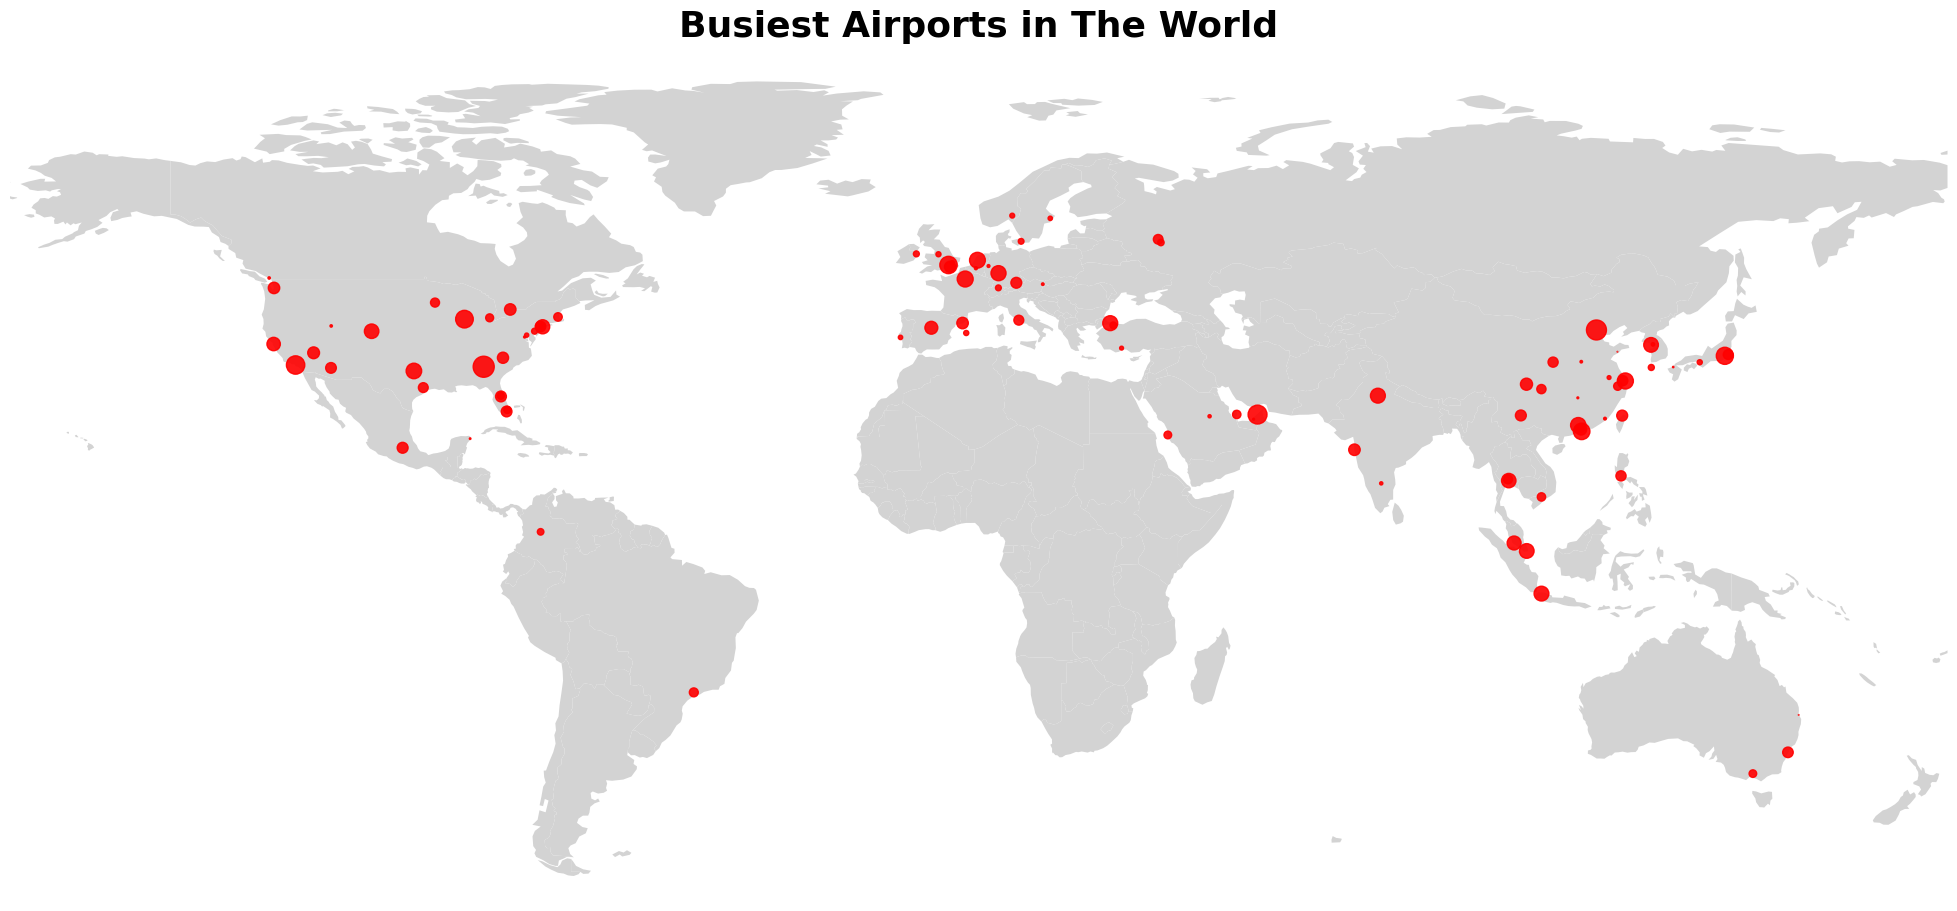

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(25,20))
gpdf.plot(color="lightgrey", ax=ax)

plt.scatter(df['Longitude'], df['Latitude'], s=230*df['Passengers'], alpha=0.9, c='red')

ax.set_title('Busiest Airports in The World',
              fontdict={'fontsize': '26', 'fontweight': 'bold'})


plt.xlim([-170, 180])
plt.ylim([-60, 90])

ax.set_axis_off()

# plt.text(-170, -60, "@abdulhamitcelk", fontstyle='italic', fontsize='15', color='#808080')

# plt.savefig("busiestairports.png", facecolor=fig.get_facecolor(), bbox_inches='tight')